Credits: this notebook belongs to Practical DL course by Yandex School of Data Analysis.

In [1]:
import numpy as np

Module is an abstract class which defines fundamental methods necessary for a training a neural network. You do not need to change anything here, just read the comments.

**Модуль - это абстрактный класс, который определяет фундаментальные методы, необходимые для обучения нейронной сети.** Вам не нужно здесь ничего менять, просто прочитайте комментарии.
В принципе, вы можете думать о модуле как о чем-то (черном ящике).
который может обрабатывать "входные" данные и выдавать "выходные" данные.

In [2]:
class Module(object):
    """
    Basically, you can think of a module as of a something (black box) 
    which can process `input` data and produce `ouput` data.
    This is like applying a function which is called `forward`: 
        
        output = module.forward(input)
    
    The module should be able to perform a backward pass: to differentiate the `forward` function. 
    More, it should be able to differentiate it if is a part of chain (chain rule).
    The latter implies there is a gradient from previous step of a chain rule. 
    
        gradInput = module.backward(input, gradOutput)
    """
    def __init__ (self): #означает инициализацию, которая отвечает за процесс установки начального состояния созданного экземпляра класса.
        self.output = None
        self.gradInput = None
        self.training = True
    
    def forward(self, input):
        """
        Takes an input object, and computes the corresponding output of the module.
        """
        #Принимает входной объект и вычисляет соответствующий выходной сигнал модуля.
        return self.updateOutput(input)

    def backward(self,input, gradOutput):
        """
        Performs a backpropagation step through the module, with respect to the given input.
        
        This includes 
         - computing a gradient w.r.t. `input` (is needed for further backprop),
         - computing a gradient w.r.t. parameters (to update parameters while optimizing).
        """
        #Выполняет шаг обратного распространения через модуль по отношению к заданному входному сигналу.
        self.updateGradInput(input, gradOutput)
        self.accGradParameters(input, gradOutput)
        return self.gradInput
    

    def updateOutput(self, input):
        """
        Computes the output using the current parameter set of the class and input.
        This function returns the result which is stored in the `output` field.
        
        Make sure to both store the data in `output` field and return it. 
        Вычисляет выходные данные, используя текущий набор параметров класса и входные данные.
        Эта функция возвращает результат, который сохраняется в поле `output`.

        Убедитесь, что вы как сохранили данные в поле "вывод", так и вернули их.
        """
        
        # The easiest case:
            
        self.output = input 
        return self.output
        
#         pass

    def updateGradInput(self, input, gradOutput):
        """
        Computing the gradient of the module with respect to its own input. 
        This is returned in `gradInput`. Also, the `gradInput` state variable is updated accordingly.
        
        The shape of `gradInput` is always the same as the shape of `input`.
        
        Make sure to both store the gradients in `gradInput` field and return it.
        Вычисление градиента модуля по отношению к его собственным входным данным.
        Это возвращается в `gradInput`. Кроме того, переменная состояния `gradInput` обновляется соответствующим образом.

        Форма `gradInput` всегда совпадает с формой `input`.

        Убедитесь, что вы оба сохранили градиенты в поле `gradInput` и вернули его.
        """
        
        # The easiest case:
        
        self.gradInput = gradOutput 
        return self.gradInput
        
#         pass   
    
    def accGradParameters(self, input, gradOutput):
        """
        Computing the gradient of the module with respect to its own parameters.
        No need to override if module has no parameters (e.g. ReLU).
        Вычисление градиента модуля по отношению к его собственным параметрам.
        Нет необходимости переопределять, если модуль не имеет параметров (например, ReLU).
        """
        pass
    
    def zeroGradParameters(self): 
        """
        Zeroes `gradParams` variable if the module has params.
        """
        pass
        
    def getParameters(self):
        """
        Returns a list with its parameters. 
        If the module does not have parameters return empty list. 
        Возвращает список с его параметрами. 
        Если модуль не имеет параметров, верните пустой список.
        """
        return []
        
    def getGradParameters(self):
        """
        Returns a list with gradients with respect to its parameters. 
        If the module does not have parameters return empty list. 
        """
        return []
    
    def train(self):
        """
        Sets training mode for the module.
        Training and testing behaviour differs for Dropout, BatchNorm.
        Устанавливает режим обучения для модуля.
        Поведение при обучении и тестировании отличается для Dropout, BatchNorm
        """
        self.training = True
    
    def evaluate(self):
        """
        Sets evaluation mode for the module.
        Training and testing behaviour differs for Dropout, BatchNorm.
        Устанавливает режим оценки для модуля.
        Поведение при обучении и тестировании отличается для Dropout, BatchNorm
        """
        self.training = False
    
    def __repr__(self):
        """
        Pretty printing. Should be overrided in every module if you want 
        to have readable description. 
        Печать
        """
        return "Module"


**Sequential container**
Define a forward and backward pass procedures.

Последовательный контейнер определяет процедуры прямого и обратного прохождения.

In [3]:
class Sequential(Module):
    """
         This class implements a container, which processes `input` data sequentially. 
         
         `input` is processed by each module (layer) in self.modules consecutively.
         The resulting array is called `output`. 
         Этот класс реализует контейнер, который последовательно обрабатывает "входные" данные.

          `input` обрабатывается каждым модулем (слоем) в self.modules последовательно.
          Результирующий массив называется `output`
    """
    
    def __init__ (self):
        super(Sequential, self).__init__()
        self.modules = []
   
    def add(self, module):
        """
        Adds a module to the container.
        """
        self.modules.append(module)

    def updateOutput(self, input):
        """
        Basic workflow of FORWARD PASS:
        
            y_0    = module[0].forward(input)
            y_1    = module[1].forward(y_0)
            ...
            output = module[n-1].forward(y_{n-2})   
            
            
        Just write a little loop. 
        """

        # Your code goes here. ################################################
        data_in = input
        data_out = None
        for i in range(len(self.modules)):
            data_in = self.modules[i].forward(data_in)
        self.output = data_in
        return self.output

    def backward(self, input, gradOutput):
        """
        Workflow of BACKWARD PASS:
            
            g_{n-1} = module[n-1].backward(y_{n-2}, gradOutput)
            g_{n-2} = module[n-2].backward(y_{n-3}, g_{n-1})
            ...
            g_1 = module[1].backward(y_0, g_2)   
            gradInput = module[0].backward(input, g_1)   
             
             
        !!!
                
        To ech module you need to provide the input, module saw while forward pass, 
        it is used while computing gradients. 
        Make sure that the input for `i-th` layer the output of `module[i]` (just the same input as in forward pass) 
        and NOT `input` to this Sequential module. 
        Для каждого модуля вам нужно предоставить входные данные, модуль видел при прямом проходе,
        он используется при вычислении градиентов.
        Убедитесь, что входные данные для `i-го` слоя совпадают с выходными данными `module[i]` 
        (точно такие же входные данные, как при прямом прохождении)
        и НЕ `ввод` в этот последовательный модуль.
        
        !!!
        
        """
        # Your code goes here. ################################################
        for i in range(len(self.modules)-1, 0, -1):
            gradOutput = self.modules[i].backward(self.modules[i-1].output, gradOutput)
            
        result = self.modules[0].backward(input, gradOutput)
        self.gradInput = result
        
        return self.gradInput
      

    def zeroGradParameters(self): 
        for module in self.modules:
            module.zeroGradParameters()
    
    def getParameters(self):
        """
        Should gather all parameters in a list.
        Следует собрать все параметры в список.
        """
        return [x.getParameters() for x in self.modules]
    
    def getGradParameters(self):
        """
        Should gather all gradients w.r.t parameters in a list.
        """
        return [x.getGradParameters() for x in self.modules]
    
    def __repr__(self):
        string = "".join([str(x) + '\n' for x in self.modules])
        return string
    
    def __getitem__(self,x):
        return self.modules.__getitem__(x)
    
    def train(self):
        """
        Propagates training parameter through all modules
        """
        self.training = True
        for module in self.modules:
            module.train()
    
    def evaluate(self):
        """
        Propagates training parameter through all modules
        """
        self.training = False
        for module in self.modules:
            module.evaluate()

**Layers**
**1. Linear transform layer**
Also known as dense layer, fully-connected layer, FC-layer, InnerProductLayer (in caffe), affine transform


Также известен как плотный слой, полностью связанный слой, FC-слой, внутренний слой продукта (in caffe), affine transform
input: batch_size x n_feats1
output: batch_size x n_feats2

In [4]:
class Linear(Module):
    """
    A module which applies a linear transformation 
    Модуль, который применяет линейное преобразование
    A common name is fully-connected layer, InnerProductLayer in caffe. 
    
    The module should work with 2D input of shape (n_samples, n_feature).
    """
    def __init__(self, n_in, n_out):
        super(Linear, self).__init__()
       
        # This is a nice initialization
        stdv = 1./np.sqrt(n_in)
        self.W = np.random.uniform(-stdv, stdv, size = (n_out, n_in))
        self.b = np.random.uniform(-stdv, stdv, size = n_out)
        
        self.gradW = np.zeros_like(self.W)
        self.gradb = np.zeros_like(self.b)
        
    def updateOutput(self, input):
        # Your code goes here. ################################################
        # self.output = ...
        self.output = np.dot(input, self.W.T) + self.b
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        # Your code goes here. ################################################
        # self.gradInput = ...
        self.gradInput = np.dot(gradOutput, self.W)
        return self.gradInput
    
    def accGradParameters(self, input, gradOutput):
        # Your code goes here. ################################################
        # self.gradW = ... ; self.gradb = ...
        self.gradW += np.sum(input[:, None, :] * gradOutput[:, :, None], axis=0)
        self.gradb += np.sum(gradOutput, axis=0)
    
    def zeroGradParameters(self):
        self.gradW.fill(0)
        self.gradb.fill(0)
        
    def getParameters(self):
        return [self.W, self.b]
    
    def getGradParameters(self):
        return [self.gradW, self.gradb]
    
    def __repr__(self):
        s = self.W.shape
        q = 'Linear %d -> %d' %(s[1],s[0])
        return q

**2. SoftMax**


input: batch_size x n_feats
output: batch_size x n_feats
 

Recall that.It makes possible to avoid computing exp() from large argument.

Это позволяет избежать вычисления exp() из большого аргумента.

In [5]:
class SoftMax(Module):
    def __init__(self):
         super(SoftMax, self).__init__()
    
    def updateOutput(self, input):
        # start with normalization for numerical stability
        #начните с нормализации для обеспечения численной стабильности
        self.output = np.subtract(input, input.max(axis=1, keepdims=True))
        
        # Your code goes here. ################################################
        out_exp = np.exp(self.output)
        self.output = out_exp / np.sum(out_exp, axis=1, keepdims=True)
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        # Your code goes here. ################################################
        gradient = self.output * gradOutput
        self.gradInput = gradient - self.output * np.sum(gradient, axis=1, keepdims=True)
        return self.gradInput
    
    def __repr__(self):
        return "SoftMax"

**LogSoftMax**


input: batch_size x n_feats
output: batch_size x n_feats

The main goal of this layer is to be used in computation of log-likelihood loss.

Основная цель этого уровня - использовать его при вычислении потери лог. правдоподобия.

In [6]:
class LogSoftMax(Module):
    def __init__(self):
         super(LogSoftMax, self).__init__()
    
    def updateOutput(self, input):
        # start with normalization for numerical stability
        self.output = np.subtract(input, input.max(axis=1, keepdims=True))
        
        # Your code goes here. ################################################
        out_exp = np.exp(self.output)
        self.output = self.output - np.log(np.sum(out_exp, axis=1, keepdims=True))
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        # Your code goes here. ################################################
        out = input - input.max(axis=1, keepdims=True)
        exp_out = np.exp(out) 
        out = exp_out / np.sum(exp_out, axis=1).reshape(-1, 1)
        self.gradInput = gradOutput - out * np.sum(gradOutput, axis=1).reshape(-1, 1)
        return self.gradInput
    
    def __repr__(self):
        return "LogSoftMax"

**4. Batch normalization**

One of the most significant recent ideas that impacted NNs a lot is Batch normalization. The idea is simple, yet effective: the features should be whitened (
, 
) all the way through NN. This improves the convergence for deep models letting it train them for days but not weeks. You are to implement the first part of the layer: features normalization. The second part (ChannelwiseScaling layer) is implemented below.


Одна из наиболее важных недавних идей, которая сильно повлияла на NNs, - это пакетная нормализация. Идея проста, но эффективна: объекты должны быть отбелены (
,
) на всем протяжении NN. Это улучшает сходимость глубоких моделей, позволяя обучать их в течение нескольких дней, а не недель. Вам предстоит реализовать первую часть слоя: нормализацию объектов. Вторая часть (уровень масштабирования по каналам) реализована ниже.

input: batch_size x n_feats

output: batch_size x n_feats

The layer should work as follows. While training (self.training == True) it transforms input as
 
where 
 and 
 - mean and variance of feature values in batch and 
 is just a small number for numericall stability. Also during training, layer should maintain exponential moving average values for mean and variance:

    self.moving_mean = self.moving_mean * alpha + batch_mean * (1 - alpha)
    self.moving_variance = self.moving_variance * alpha + batch_variance * (1 - alpha)

этот слой должен работать следующим образом. Во время обучения (self.training == True) он преобразует входные данные как
 
где
и - среднее значение и дисперсия значений признаков в пакете и
является лишь небольшим числом для числовой стабильности. 

**Также во время обучения слой должен поддерживать экспоненциальные скользящие средние значения для среднего значения и дисперсии.**


During testing (self.training == False) the layer normalizes input using moving_mean and moving_variance.

Note that decomposition of batch normalization on normalization itself and channelwise scaling here is just a common implementation choice. In general "**batch normalization"** always assumes normalization + scaling.

Обратите внимание, что декомпозиция пакетной нормализации на саму нормализацию и масштабирование по каналам здесь - всего лишь обычный выбор реализации. В общем случае "пакетная нормализация" всегда предполагает нормализацию + масштабирование.

In [7]:
class BatchNormalization(Module):
    EPS = 1e-3
    def __init__(self, alpha = 0.):
        super(BatchNormalization, self).__init__()
        self.alpha = alpha
        self.moving_mean = 0 
        self.moving_variance = 1
        
    def updateOutput(self, input):
        # Your code goes here. ################################################
        # use self.EPS please
        if self.training:
            mean_batch = np.mean(input, axis=0)
            variance_batch = np.var(input, axis=0)
            self.moving_mean = self.moving_mean * self.alpha + mean_batch * (1 - self.alpha)
            self.moving_variance = self.moving_variance * self.alpha + variance_batch * (1 - self.alpha)
            self.output = (input - mean_batch) / np.sqrt(variance_batch + self.EPS)
        else:
            self.output = (input - self.moving_mean) / np.sqrt(self.moving_variance + self.EPS)
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        # Your code goes here. ################################################
        size = input.shape[0]
        variance_batch = np.var(input, axis=0)
        det = size * np.sqrt(variance_batch + self.EPS)
        self.gradInput = (size * gradOutput - np.sum(gradOutput, axis=0, keepdims=True)
                          - np.sum(gradOutput * self.output, axis=0, keepdims=True) * self.output) / det
        return self.gradInput
    
    def __repr__(self):
        return "BatchNormalization"

In [8]:
class ChannelwiseScaling(Module):
    """
       Implements linear transform of input y = \gamma * x + \beta
       where \gamma, \beta - learnable vectors of length x.shape[-1]
    """
    def __init__(self, n_out):
        super(ChannelwiseScaling, self).__init__()

        stdv = 1./np.sqrt(n_out)
        self.gamma = np.random.uniform(-stdv, stdv, size=n_out)
        self.beta = np.random.uniform(-stdv, stdv, size=n_out)
        
        self.gradGamma = np.zeros_like(self.gamma)
        self.gradBeta = np.zeros_like(self.beta)

    def updateOutput(self, input):
        self.output = input * self.gamma + self.beta
        return self.output
        
    def updateGradInput(self, input, gradOutput):
        self.gradInput = gradOutput * self.gamma
        return self.gradInput
    
    def accGradParameters(self, input, gradOutput):
        self.gradBeta = np.sum(gradOutput, axis=0)
        self.gradGamma = np.sum(gradOutput*input, axis=0)
    
    def zeroGradParameters(self):
        self.gradGamma.fill(0)
        self.gradBeta.fill(0)
        
    def getParameters(self):
        return [self.gamma, self.beta]
    
    def getGradParameters(self):
        return [self.gradGamma, self.gradBeta]
    
    def __repr__(self):
        return "ChannelwiseScaling"

Practical notes. If BatchNormalization is placed after a linear transformation layer (including dense layer, convolutions, channelwise scaling) that implements function like y = weight * x + bias, than bias adding become useless and could be omitted since its effect will be discarded while batch mean subtraction. If BatchNormalization (followed by ChannelwiseScaling) is placed before a layer that propagates scale (including ReLU, LeakyReLU) followed by any linear transformation layer than parameter gamma in ChannelwiseScaling could be freezed since it could be absorbed into the linear transformation layer.

Практические замечания. Если **BatchNormalization** помещается **после** слоя линейного преобразования (включая плотный слой, свертки, масштабирование по каналам), который реализует функцию типа y = вес * x + смещение, то добавление смещения становится бесполезным и может быть опущено, поскольку его эффект будет отброшен при вычитании среднего значения пакета. 

Если **BatchNormalization **(за которым следует масштабирование канала) помещается **перед** слоем, который распространяет масштабирование (включая ReLU, LeakyReLU), за которым следует любой слой линейного преобразования, то параметр gamma в масштабировании канала может быть заморожен, поскольку он может быть поглощен слоем линейного преобразования.

**5. Dropout**
Implement dropout. 
he idea and implementation is really simple: just multimply the input by 
 mask. Here 
 is probability of an element to be zeroed.

This has proven to be an effective technique for regularization and preventing the co-adaptation of neurons.

While training (self.training == True) it should sample a mask on each iteration (for every batch), zero out elements and multiply elements by 
. The latter is needed for keeping mean values of features close to mean values which will be in test mode. When testing this module should implement identity transform i.e. self.output = input.


Внедрите dropout
идея и реализация действительно просты: просто умножьте входные данные на
маску. Здесь
указана вероятность того, что элемент будет обнулен.

Это оказалось эффективным методом для регуляризации и предотвращения совместной адаптации нейронов.

Во время обучения (self.training == True) он должен отбирать маску на каждой итерации (для каждого пакета), обнулять элементы и перемножать элементы.
Последнее необходимо для поддержания средних значений функций близкими к средним значениям, которые будут находиться в тестовом режиме. 
При тестировании этот модуль должен реализовать преобразование идентичности, т.е. self.output = input.



input: batch_size x n_feats
output: batch_size x n_feats

In [10]:
class Dropout(Module):
    def __init__(self, p=0.5):
        super(Dropout, self).__init__()
        
        self.p = p
        self.mask = None
      
    def updateOutput(self, input):
        # Your code goes here. ################################################
        if self.training:
            size = input.shape
            p = 1 - self.p
            self.mask = np.random.binomial(size=size, p=p, n=1)
            self.output = input * self.mask / p
        else:
            self.output = input
        return  self.output
    def updateGradInput(self, input, gradOutput):
        # Your code goes here. ################################################
        self.gradInput = gradOutput * self.mask / (1 - self.p)
        return self.gradInput
        
    def __repr__(self):
        return "Dropout"

**Activation functions**

Here's the complete example for the Rectified Linear Unit non-linearity (aka ReLU).
Функции активации Вот полный пример нелинейности исправленной линейной единицы измерения (он же ReLU):

In [11]:
class ReLU(Module):
    def __init__(self):
         super(ReLU, self).__init__()
    
    def updateOutput(self, input):
        self.output = np.maximum(input, 0)
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        self.gradInput = np.multiply(gradOutput , input > 0)
        return self.gradInput
    
    def __repr__(self):
        return "ReLU"

**6. Leaky ReLU**

Implement Leaky Rectified Linear Unit. 
Expriment with slope.
Реализуйте Leaky ReLU 
Поэкспериментируйте с наклоном.

In [13]:
class LeakyReLU(Module):
    def __init__(self, slope = 0.03):
        super(LeakyReLU, self).__init__()
            
        self.slope = slope       
    def updateOutput(self, input):
        # Your code goes here. ################################################
        right_side = (input > 0).astype(int)
        left_side = (input <= 0).astype(int)
        self.output = input * right_side + self.slope * input * left_side
        return  self.output  
    def updateGradInput(self, input, gradOutput):
        # Your code goes here. ################################################
        right_side = (input > 0).astype(int)
        left_side = (input <= 0).astype(int)
        self.gradInput = gradOutput * right_side + gradOutput * self.slope * left_side
        return self.gradInput  
    def __repr__(self):
        return "LeakyReLU"

**7. ELU**
Implement Exponential Linear Units activations

In [14]:
class ELU(Module):
    def __init__(self, alpha = 1.0):
        super(ELU, self).__init__()        
        self.alpha = alpha       
    def updateOutput(self, input):
        # Your code goes here. ################################################
        right_side = (input > 0).astype(int)
        left_side = (input <= 0).astype(int)
        exp = np.exp(input) - 1
        self.output = input * right_side + self.alpha * exp * left_side
        return  self.output    
    def updateGradInput(self, input, gradOutput):
        # Your code goes here. ################################################
        right_side = (input > 0).astype(int)
        left_side = (input <= 0).astype(int)
        self.gradInput = gradOutput * right_side + gradOutput * (self.alpha + self.output) * left_side
        return self.gradInput   
    def __repr__(self):
        return "ELU"

**8. SoftPlus**
Implement SoftPlus activations. 
Look, how they look a lot like ReLU.
Посмотри, как они похожи во многом на ReLU

In [15]:
class SoftPlus(Module):
    def __init__(self):
        super(SoftPlus, self).__init__()
    
    def updateOutput(self, input):
        # Your code goes here. ################################################
        exp = np.exp(input)
        self.output = np.log(1 + exp)
        return  self.output
    
    def updateGradInput(self, input, gradOutput):
        # Your code goes here. ################################################
        minus_exp = np.exp(-input)
        self.gradInput = gradOutput / (1 + minus_exp)
        return self.gradInput
    
    def __repr__(self):
        return "SoftPlus"

**Criterions**

Criterions are used to score the models answers.
Критерии используются для оценки ответов моделей.

In [16]:
class Criterion(object):
    def __init__ (self):
        self.output = None
        self.gradInput = None
        
    def forward(self, input, target):
        """
            Given an input and a target, compute the loss function 
            associated to the criterion and return the result.
            
            For consistency this function should not be overrided,
            all the code goes in `updateOutput`.
            Учитывая входные данные и цель, вычислите функцию потерь, связанную с критерием, 
            и верните результат.        
            Для обеспечения согласованности эта функция не должна быть переопределена,
          весь код передается в `update Output`.
        """
        return self.updateOutput(input, target)

    def backward(self, input, target):
        """
            Given an input and a target, compute the gradients of the loss function
            associated to the criterion and return the result. 

            For consistency this function should not be overrided,
            all the code goes in `updateGradInput`.
        """
        return self.updateGradInput(input, target)
    
    def updateOutput(self, input, target):
        """
        Function to override.
        """
        return self.output

    def updateGradInput(self, input, target):
        """
        Function to override.
        """
        return self.gradInput   

    def __repr__(self):
        """
        Pretty printing. Should be overrided in every module if you want 
        to have readable description. 
        """
        return "Criterion"

**The MSECriterion**, which is basic L2 norm usually used for regression, is implemented here for you.

обычно используется для регрессии, реализовано здесь для вас

input: batch_size x n_feats
target: batch_size x n_feats
output: **scalar**

In [17]:
class MSECriterion(Criterion):
    def __init__(self):
        super(MSECriterion, self).__init__()
        
    def updateOutput(self, input, target):   
        self.output = np.sum(np.power(input - target,2)) / input.shape[0]
        return self.output 
 
    def updateGradInput(self, input, target):
        self.gradInput  = (input - target) * 2 / input.shape[0]
        return self.gradInput

    def __repr__(self):
        return "MSECriterion"

**9. Negative LogLikelihood criterion (numerically unstable)**


You task is to implement the ClassNLLCriterion. 
It should implement multiclass log loss. Nevertheless there is a sum over y (target) in that formula, remember that targets are one-hot encoded. This fact simplifies the computations a lot. Note, that criterions are the only places, where you divide by batch size. Also there is a small hack with adding small number to probabilities to avoid computing log(0).

Он должен реализовать log loss мультикласса. Тем не менее, в этой формуле есть сумма по y (target), помните, что **целевые значения кодируются в** **однократном **порядке. Этот факт значительно упрощает вычисления. Обратите внимание, что критерии - это единственные места, где вы делите по размеру пакета. 
Также есть небольшой взлом с добавлением небольшого числа к вероятностям, чтобы избежать вычисления log (0).

input: batch_size x n_feats - probabilities
target: batch_size x n_feats - one-hot representation of ground truth
output: **scalar**

In [18]:
class ClassNLLCriterionUnstable(Criterion):
    EPS = 1e-15
    def __init__(self):
        a = super(ClassNLLCriterionUnstable, self)
        super(ClassNLLCriterionUnstable, self).__init__()
        
    def updateOutput(self, input, target): 
        
        # Use this trick to avoid numerical errors
        input_clamp = np.clip(input, self.EPS, 1 - self.EPS)
        
        # Your code goes here. ################################################
        size = input.shape[0]
        nllc = target * np.log(input_clamp)
        self.output = -np.sum(nllc) / size
        return self.output

    def updateGradInput(self, input, target):
        
        # Use this trick to avoid numerical errors
        input_clamp = np.clip(input, self.EPS, 1 - self.EPS)
                
        # Your code goes here. ################################################
        size = input.shape[0]
        self.gradInput = -target / (input_clamp * size)
        return self.gradInput
    
    def __repr__(self):
        return "ClassNLLCriterionUnstable"

**10. Negative LogLikelihood criterion (numerically stable)**
input: batch_size x n_feats - log probabilities
target: batch_size x n_feats - one-hot representation of ground truth
output: **scalar**
Task is similar to the previous one, but now the criterion input is the output of log-softmax layer. This decomposition allows us to avoid problems with computation of forward and backward of log().

Задача аналогична предыдущей, но теперь входным критерием является вывод слоя log-softmax. Такое разложение позволяет нам избежать проблем с вычислением прямого и обратного хода log().

In [19]:
class ClassNLLCriterion(Criterion):
    def __init__(self):
        a = super(ClassNLLCriterion, self)
        super(ClassNLLCriterion, self).__init__()
        
    def updateOutput(self, input, target): 
        # Your code goes here. ################################################
        size = input.shape[0]
        self.output = -np.sum(input * target) / size
        return self.output

    def updateGradInput(self, input, target):
        # Your code goes here. ################################################
        size = input.shape[0]
        self.gradInput = -target / size
        return self.gradInput
    
    def __repr__(self):
        return "ClassNLLCriterion"

**Optimizers**

**SGD optimizer with momentum variables**
 - list of lists of variables (one list per layer)
gradients - list of lists of current gradients (same structure as for variables, one array for each var)
config - dict with optimization parameters (learning_rate and momentum)
state - dict with optimizator state (used to save accumulated gradients)

список списков переменных (по одному списку на слой)
градиенты - список списков текущих градиентов (та же структура, что и для переменных, по одному массиву для каждой переменной)
конфигурация с параметрами оптимизации (learning_rate и momentum)
state - диктует состояние оптимизации (используется для сохранения накопленных градиентов)

In [20]:
def sgd_momentum(variables, gradients, config, state):  
    # 'variables' and 'gradients' have complex structure, accumulated_grads will be stored in a simpler one
    state.setdefault('accumulated_grads', {})
    
    var_index = 0 
    for current_layer_vars, current_layer_grads in zip(variables, gradients): 
        for current_var, current_grad in zip(current_layer_vars, current_layer_grads):
            
            old_grad = state['accumulated_grads'].setdefault(var_index, np.zeros_like(current_grad))
            
            np.add(config['momentum'] * old_grad, config['learning_rate'] * current_grad, out=old_grad)
            
            current_var -= old_grad
            var_index += 1     

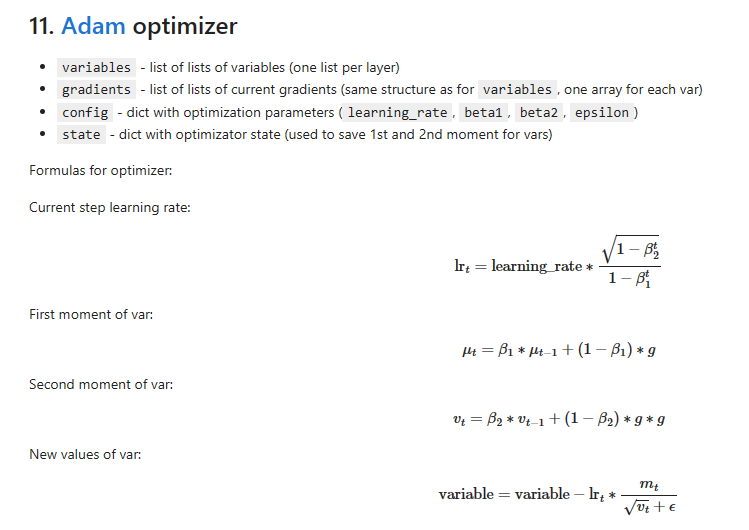


Layers for advanced track homework
You don't need to implement it if you are working on homework_main-basic.ipynb

**12. Conv2d [Advanced]**
input: batch_size x in_channels x h x w
output: batch_size x out_channels x h x w
You should implement something like pytorch Conv2d layer with stride=1 and zero-padding outside of image using scipy.signal.correlate function.

Practical notes:

While the layer name is "convolution", the most of neural network frameworks (including tensorflow and pytorch) implement operation that is called correlation in signal processing theory. So don't use scipy.signal.convolve since it implements convolution in terms of signal processing.
It may be convenient to use skimage.util.pad for zero-padding.
It's rather ok to implement convolution over 4d array using 2 nested loops: one over batch size dimension and another one over output filters dimension
Having troubles with understanding how to implement the layer?
Check the last year video of lecture 3 (starting from ~1:14:20)
May the google be with you

**13. MaxPool2d [Advanced]**
input: batch_size x n_input_channels x h x w
output: batch_size x n_output_channels x h // kern_size x w // kern_size
You are to implement simplified version of pytorch MaxPool2d layer with stride = kernel_size. Please note, that it's not a common case that stride = kernel_size: in AlexNet and ResNet kernel_size for max-pooling was set to 3, while stride was set to 2. We introduce this restriction to make implementation simplier.

Practical notes:

During forward pass what you need to do is just to reshape the input tensor to [n, c, h / kern_size, kern_size, w / kern_size, kern_size], swap two axes and take maximums over the last two dimensions. Reshape + axes swap is sometimes called space-to-batch transform.
During backward pass you need to place the gradients in positions of maximal values taken during the forward pass
In real frameworks the indices of maximums are stored in memory during the forward pass. It is cheaper than to keep the layer input in memory and recompute the maximums.

**Flatten layer**

Just reshapes inputs and gradients. It's usually used as proxy layer between Conv2d and Linear.